```{admonition} Information
__Section__: Type of task and predicted attributes  
__Goal__: Understand how the type of the task (classification or regression) and the type of the attribute can affect the performance.  
__Time needed__: x min  
__Prerequisites__: AIS data, basics about machine learning
```

# Type of task and predicted attributes

In this section, we will study the difference between classification and regression tasks, their meaning and the type of attributes to be used for each.

For the whole section, we will use the static dataset.

In [1]:
%run 1-functions.ipynb # this line runs the other functions we will use later on the page

import pandas as pd

static_data = pd.read_csv('./static_data.csv')

## Predict the width of a ship

Naturally, when we talk about the prediction of a ``width``, we think of using a regression model: the width is a numerical continuous variable, and can take any value in a certain range.

Here, we want to try some experiments and compare the results of a prediction with a regression model and with a classification model.

Let's start by building a classic model of regression.

```{toggle} Advanced level
We use here the function ``knn_regression()``. For the experiment, we will drop the missing values with the function ``dropna()``.
```

In [4]:
from sklearn.metrics import mean_absolute_error

x = ['Length']
y = ['Width']

df = static_data.copy()
df = df.dropna()

predictions_reg, ytest_reg = knn_regression(df, x, y)
print('MAE with regression: ' + str(mean_absolute_error(predictions_reg, ytest_reg)))

MAE with regression: 2.0717238095238097


If we want to try it as a classification task, we need a fixed set of values.

To transform the task into a classification task, we need to convert all values of width to a class (category). The number of unique values of width is too high (``336``), so we will try to approximate the values to the closest integer.

In [21]:
print(static_data['Width'].unique())
print('Number of unique values: ' + str(len(static_data['Width'].unique())))

[  nan 19.5   5.1   9.76  4.7   7.17  4.5   8.84  7.3   6.1   6.86  7.32
  6.71 10.4   4.3  22.28 35.96 12.8  27.59  6.81  5.2   4.2   7.9  42.92
 12.19  7.36 23.98 32.9  11.6  30.    4.8   9.48  8.5   9.75  9.1   9.
  3.5  32.2  18.65 28.8  10.22  9.78  9.85 32.3  11.41 10.97  5.9  21.34
  3.6   5.8   6.   23.   32.26  7.5  10.66  5.43  7.55  9.8  32.24 21.23
 48.04 11.89  9.93 32.29 13.42  4.4   8.53 32.   10.5   5.94 23.93  6.18
  8.23 24.   50.    3.8  12.2  32.23  5.3  18.28  5.    5.5   6.6   8.61
 28.    7.2   6.99 10.37  7.93  4.9   6.7  20.2  16.24 40.   18.45  9.2
 28.2  10.98  7.01 14.18 10.83 36.5   9.5  10.36  8.8   6.41 29.   23.8
 27.8   5.49 10.7   7.    4.6   3.9  10.   42.8  10.1   9.3  22.    9.45
 29.01 27.   15.    7.88  8.93  7.31 17.8  10.68  5.33  6.84  4.72  7.02
 17.28 14.    6.8   9.96  6.57  6.4  45.   11.26 37.   12.    8.    6.06
 11.59 28.36 24.04  8.6   9.35 46.2   3.96  4.27  6.89  8.34  5.46  7.57
 20.1  10.94  7.83  3.   23.22  3.4  10.3  13.41  4.06 

After a conversion to ``int`` type, we only have ``34`` values left. It is more acceptable for a classification task.

In [22]:
print(df['Width'].astype('int').unique())
print('Number of unique values: ' + str(len(df['Width'].astype('int').unique())))

[ 9 35 42 12 30  8 18 28 32 10 21 23  7 13 24 50 16 40 36 29 22 27 15 17
 45 11 37  6 14  4 20 44  5 26]
Number of unique values: 34


Before doing the classification task, let's just have a look at the error of the regression task if we convert the values to integers, to allow a fair comparison with the classification later:

In [6]:
reg_int = []
for element in predictions_reg:
    reg_int.append(int(element[0]))
y_int = []
print('MAE with regression int: ' + str(mean_absolute_error(reg_int, ytest_reg)))

MAE with regression int: 2.093571428571429


We see that the performances are not very far from each other. Let's now have a look at the classification task.

```{toggle} Advanced level
First, we transform the attribute to ``int``, then to ``category``. We use the function ``knn_classification()`` for the prediction.
```

In [7]:
df['Width'] = df['Width'].astype('int')
df['Width'] = df['Width'].astype('category')

predictions_clas, ytest_clas = knn_classification(df, x, y)
print('MAE with classification: ' + str(mean_absolute_error(predictions_clas, ytest_clas)))

MAE with classification: 2.8095238095238093


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Now that we have the performances for each model, let's plot the predictions, to have a better view on the models:

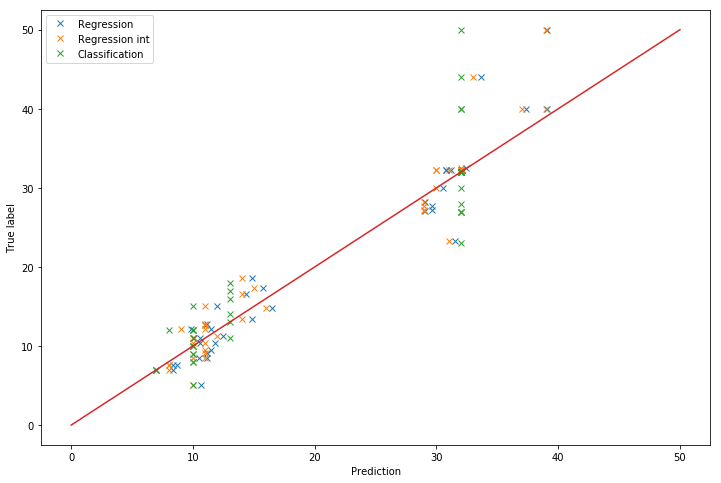

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (12, 8))

pred = []
for element in predictions_reg:
    pred.append(element[0])
plt.plot(pred, ytest_reg, 'x', label = 'Regression')

pred = []
for element in predictions_reg:
    pred.append(int(element[0]))
plt.plot(pred, ytest_reg, 'x', label = 'Regression int')

plt.plot(predictions_clas, ytest_clas, 'x', label = 'Classification')

# We add the diagonal to represent the perfect prediction line
x = np.linspace(0, 50, 50)
plt.plot(x, x, color = 'black')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.legend()
plt.show()

On the graph, it is clearly visible that the predictions of the classification task can take only some values. In the end, the model built with the classification algorithm does not give such a bad performance if we look at the MAE. However, when looking at the graph, it is clear that the regression model is better. The green crosses are globally further away from the diagonal of perfect prediction.

## Predict the type of vessel

Now, we would like to do the opposite experiment: predict the attribute ``VesselType``, which is a code, with regression and classification. Let's start with having a look at the number of unique values for the attribute:

In [20]:
df = static_data.copy()
df = df.dropna()

print(df['VesselType'].unique())
print('Number of unique values: ' + str(len(df['VesselType'].unique())))

[1012. 1004. 1025.   70. 1001.   99.   80. 1024. 1018.   30. 1020. 1023.
 1005.   90. 1011. 1019.   37.   52. 1002. 1010.   79.   71.    0.]
Number of unique values: 23


``23`` values is correct, and it makes sense: the attribute ``VesselType``, even if it is numerical, is actually a code and can take only some fixed values. Let's now compare the performances of the regression and classification models for this task:

In [24]:
from sklearn.metrics import mean_absolute_error

x = ['Length', 'Width', 'MeanSOG']
y = ['VesselType']

predictions_reg, ytest_reg = knn_regression(df, x, y)
print('MAE with regression: ' + str(mean_absolute_error(predictions_reg, ytest_reg)))

MAE with regression: 159.2952380952381


The error seems quite big compared to the width prediction of before, but we have to keep in mind that the values in ``VesselType`` are bigger values: they can take values around 1000.

Now let's have a look at the MAE with integers prediction:

In [25]:
reg_int = []
for element in predictions_reg:
    reg_int.append(int(element[0]))
y_int = []
print('MAE with regression int: ' + str(mean_absolute_error(reg_int, ytest_reg)))

MAE with regression int: 159.71428571428572


It is slightly above the previous error, but not much. Let's now have a look at the classification model.

In [26]:
df['VesselType'] = df['VesselType'].astype('category')

predictions_clas, ytest_clas = knn_classification(df, x, y)
print('MAE with classification: ' + str(mean_absolute_error(predictions_clas, ytest_clas)))

MAE with classification: 77.88095238095238


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


We notice that the error is more than twice lower than the one with the regression model. It is no surprise, as the attribute ``VesselType`` is a categorical attribute, and not a continuous numerical one: regression makes no sense for the prediction of this attribute.

Keep in mind that, in the case of a classification, each class is considered at the same "level" to each other, whereas in a regression task, two values which are closer to each other are more similar for the model. For example, if we want to classify a vessel type, the types ``1001`` (fishing vessel), ``1012`` (passenger vessel) and ``31`` (tugboat) are all considered on the same level. In a regression task, the model will consider that the types ``1001`` and ``1012`` are more similar to each other than the type ``31``, because of the values of the codes (the difference between 1001 and 1012 is 11, where it is more than 900 to 31). In the real world, it makes no sense to consider that a fishing vessel and a passenger vessel are 10 times more similar to each other than to a tugboat.

## Generalization

To choose the right type of task, besides looking at the type of the attribute (for example, one won't be able to perform a regression task on a string attribute, except for some tricks to transform the strings into numerical variables), it is important to keep in mind the meaning of the attribute:
+ if the attribute represents a class and can take only a fixed number of values, then a classification task should be used. Even if the attribute presents into a numerical form (such as a code).
+ if the attribute is a continuous number and can take any value in a certain range, then a regression task is chosen.

## Quiz

In [1]:
from IPython.display import IFrame
IFrame("https://h5p.org/h5p/embed/761894", "694", "600")